# Basic ML: Phonocardiograms

Author: Jake Dumbauld <br>
Contact: jacobmilodumbauld@gmail.com<br>
Date: 3.15.22

## Imports

In [30]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import re

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

## Building a Simple Feed Forward Network

### Raw Signal Data

In [2]:
raw = np.load('/Users/jmd/Documents/BOOTCAMP/Capstone/arrays/signal_murmur_presimple_4k.npy', allow_pickle=True)

In [3]:
y = raw[:,0] #murmurs are just the first column
X = raw[:,1:]

In [4]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3)

In [67]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization()) 

model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())  

model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())  

model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
model.add(layers.Dropout(0.4))

# Declare the output layer
model.add(layers.Dense(1, kernel_regularizer=regularizers.l2(0.001), activation="sigmoid"))

#declaring learning rate schedule
lr_schedule = keras.optimizers.schedules.InverseTimeDecay(0.0001, decay_steps=1.0, decay_rate=0.1)


model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(lr_schedule),  
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [68]:
# Train the network
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.3)

Epoch 1/100
46/46 [==============================] - 30s 630ms/step - loss: 3.6824 - binary_accuracy: 0.6136 - val_loss: 3.6331 - val_binary_accuracy: 0.7389
Epoch 2/100
46/46 [==============================] - 28s 615ms/step - loss: 3.6075 - binary_accuracy: 0.6505 - val_loss: 3.6206 - val_binary_accuracy: 0.7943
Epoch 3/100
46/46 [==============================] - 28s 615ms/step - loss: 3.6486 - binary_accuracy: 0.6446 - val_loss: 3.6087 - val_binary_accuracy: 0.8070
Epoch 4/100
46/46 [==============================] - 28s 618ms/step - loss: 3.6099 - binary_accuracy: 0.6735 - val_loss: 3.6059 - val_binary_accuracy: 0.7896
Epoch 5/100
46/46 [==============================] - 28s 619ms/step - loss: 3.6192 - binary_accuracy: 0.6530 - val_loss: 3.6003 - val_binary_accuracy: 0.7880
Epoch 6/100
46/46 [==============================] - 28s 618ms/step - loss: 3.6137 - binary_accuracy: 0.6581 - val_loss: 3.5946 - val_binary_accuracy: 0.7816
Epoch 7/100
46/46 [==============================] -

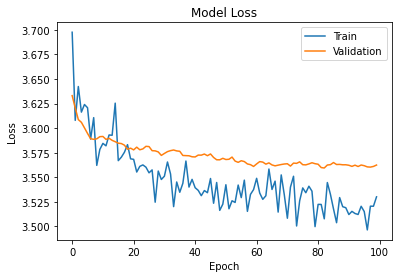

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [70]:
# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_test,y_test, verbose=1)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")

# Generate predictions
predictions = model.predict(X_test)

29/29 [==============================] - 9s 308ms/step - loss: 3.5599 - binary_accuracy: 0.7453
Train Accuracy: 0.7072
Test Accuracy: 0.7453


In [98]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 1024)              50332672  
_________________________________________________________________
dropout_57 (Dropout)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_75 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_58 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 512)               2048      
_________________________________________________________________
dense_76 (Dense)             (None, 128)             

In [101]:
#saving model
model.save('/Users/jmd/Documents/BOOTCAMP/Capstone/neural_nets/FFN_raw_signal_no_patient')

INFO:tensorflow:Assets written to: /Users/jmd/Documents/BOOTCAMP/Capstone/neural_nets/FFN_raw_signal_no_patient/assets


### MFCC w/o Patient Info: FFN

In [71]:
X = np.load('/Users/jmd/Documents/BOOTCAMP/Capstone/arrays/MFCCs_noPatient.npy', allow_pickle=True)
y = np.load('/Users/jmd/Documents/BOOTCAMP/Capstone/arrays/target_array.npy', allow_pickle=True)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3)

In [76]:
X_train.shape

(2104, 20, 97)

In [83]:
# Create a new sequential model
FNN_MFCC_n_pt = keras.Sequential()

# Declare the hidden layers
FNN_MFCC_n_pt.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
#model.add(layers.Dropout(0.4))
FNN_MFCC_n_pt.add(layers.BatchNormalization())  

FNN_MFCC_n_pt.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
#model.add(layers.Dropout(0.4))
FNN_MFCC_n_pt.add(layers.BatchNormalization())  

FNN_MFCC_n_pt.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
#model.add(layers.Dropout(0.4))

# Declare the output layer
FNN_MFCC_n_pt.add(layers.Dense(1, kernel_regularizer=regularizers.l2(0.001), activation="sigmoid"))

#declaring learning rate schedule
lr_schedule = keras.optimizers.schedules.InverseTimeDecay(0.001, decay_steps=1.0, decay_rate=0.1)


FNN_MFCC_n_pt.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(lr_schedule),  
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [84]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history2 = FNN_MFCC_n_pt.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=0.3, callbacks=[es_callback])

Epoch 1/1000
46/46 [==============================] - 1s 13ms/step - loss: 0.9450 - binary_accuracy: 0.7848 - val_loss: 1.0170 - val_binary_accuracy: 0.7397
Epoch 2/1000
46/46 [==============================] - 0s 10ms/step - loss: 0.8828 - binary_accuracy: 0.8012 - val_loss: 0.9220 - val_binary_accuracy: 0.7800
Epoch 3/1000
46/46 [==============================] - 0s 10ms/step - loss: 0.8768 - binary_accuracy: 0.7945 - val_loss: 0.8924 - val_binary_accuracy: 0.7881
Epoch 4/1000
46/46 [==============================] - 0s 10ms/step - loss: 0.8604 - binary_accuracy: 0.8012 - val_loss: 0.8791 - val_binary_accuracy: 0.7915
Epoch 5/1000
46/46 [==============================] - 0s 10ms/step - loss: 0.8413 - binary_accuracy: 0.8086 - val_loss: 0.8727 - val_binary_accuracy: 0.7922
Epoch 6/1000
46/46 [==============================] - 0s 10ms/step - loss: 0.8324 - binary_accuracy: 0.8104 - val_loss: 0.8678 - val_binary_accuracy: 0.7924
Epoch 7/1000
46/46 [==============================] - 0s 1

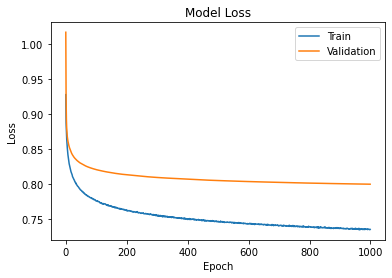

In [85]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [87]:
# Evaluate the network
train_accuracy = history2.history["binary_accuracy"][-1]
result = FNN_MFCC_n_pt.evaluate(X_test,y_test, verbose=1)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")

29/29 [==============================] - 0s 3ms/step - loss: 0.7991 - binary_accuracy: 0.7930
Train Accuracy: 0.8039
Test Accuracy: 0.7930


In [95]:
FNN_MFCC_n_pt.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 20, 512)           50176     
_________________________________________________________________
batch_normalization_47 (Batc (None, 20, 512)           2048      
_________________________________________________________________
dense_88 (Dense)             (None, 20, 128)           65664     
_________________________________________________________________
batch_normalization_48 (Batc (None, 20, 128)           512       
_________________________________________________________________
dense_89 (Dense)             (None, 20, 32)            4128      
_________________________________________________________________
dense_90 (Dense)             (None, 20, 1)             33        
Total params: 122,561
Trainable params: 121,281
Non-trainable params: 1,280
___________________________________________

In [102]:
#saving model
FNN_MFCC_n_pt.save('/Users/jmd/Documents/BOOTCAMP/Capstone/neural_nets/FFN_MFCC_no_patient')

INFO:tensorflow:Assets written to: /Users/jmd/Documents/BOOTCAMP/Capstone/neural_nets/FFN_MFCC_no_patient/assets


### MFCC w/ Patient Info: FFN

In [88]:
X = np.load('/Users/jmd/Documents/BOOTCAMP/Capstone/arrays/MFCCs_withPatient.npy', allow_pickle=True)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3)

In [90]:
X_train.shape

(2104, 30, 97)

In [91]:
# Create a new sequential model
FNN_MFCC_y_pt = keras.Sequential()

# Declare the hidden layers
FNN_MFCC_y_pt.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
#model.add(layers.Dropout(0.4))
FNN_MFCC_y_pt.add(layers.BatchNormalization())  

FNN_MFCC_y_pt.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
#model.add(layers.Dropout(0.4))
FNN_MFCC_y_pt.add(layers.BatchNormalization())  

FNN_MFCC_y_pt.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
#model.add(layers.Dropout(0.4))

# Declare the output layer
FNN_MFCC_y_pt.add(layers.Dense(1, kernel_regularizer=regularizers.l2(0.001), activation="sigmoid"))

#declaring learning rate schedule
lr_schedule = keras.optimizers.schedules.InverseTimeDecay(0.001, decay_steps=1.0, decay_rate=0.1)


FNN_MFCC_y_pt.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(lr_schedule),  
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [92]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history3 = FNN_MFCC_y_pt.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=0.3, callbacks=[es_callback])

Epoch 1/1000
46/46 [==============================] - 1s 16ms/step - loss: 0.9659 - binary_accuracy: 0.7666 - val_loss: 1.0043 - val_binary_accuracy: 0.7430
Epoch 2/1000
46/46 [==============================] - 1s 12ms/step - loss: 0.9005 - binary_accuracy: 0.7934 - val_loss: 0.9253 - val_binary_accuracy: 0.7876
Epoch 3/1000
46/46 [==============================] - 1s 12ms/step - loss: 0.8668 - binary_accuracy: 0.8079 - val_loss: 0.9072 - val_binary_accuracy: 0.7870
Epoch 4/1000
46/46 [==============================] - 1s 12ms/step - loss: 0.8761 - binary_accuracy: 0.7947 - val_loss: 0.8882 - val_binary_accuracy: 0.7948
Epoch 5/1000
46/46 [==============================] - 1s 12ms/step - loss: 0.8576 - binary_accuracy: 0.8021 - val_loss: 0.8772 - val_binary_accuracy: 0.7967
Epoch 6/1000
46/46 [==============================] - 1s 12ms/step - loss: 0.8571 - binary_accuracy: 0.7999 - val_loss: 0.8690 - val_binary_accuracy: 0.7975
Epoch 7/1000
46/46 [==============================] - 1s 1

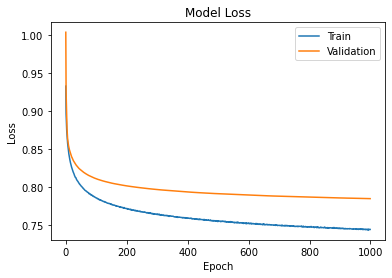

In [93]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [94]:
# Evaluate the network
train_accuracy = history3.history["binary_accuracy"][-1]
result = FNN_MFCC_y_pt.evaluate(X_test,y_test, verbose=1)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")

29/29 [==============================] - 0s 4ms/step - loss: 0.7926 - binary_accuracy: 0.7928
Train Accuracy: 0.8005
Test Accuracy: 0.7928


In [96]:
FNN_MFCC_y_pt.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 30, 512)           50176     
_________________________________________________________________
batch_normalization_49 (Batc (None, 30, 512)           2048      
_________________________________________________________________
dense_92 (Dense)             (None, 30, 128)           65664     
_________________________________________________________________
batch_normalization_50 (Batc (None, 30, 128)           512       
_________________________________________________________________
dense_93 (Dense)             (None, 30, 32)            4128      
_________________________________________________________________
dense_94 (Dense)             (None, 30, 1)             33        
Total params: 122,561
Trainable params: 121,281
Non-trainable params: 1,280
___________________________________________

In [103]:
#saving model
FNN_MFCC_y_pt.save('/Users/jmd/Documents/BOOTCAMP/Capstone/neural_nets/FFN_MFCC_with_patient')

INFO:tensorflow:Assets written to: /Users/jmd/Documents/BOOTCAMP/Capstone/neural_nets/FFN_MFCC_with_patient/assets


---

## Framework

How to Approach the Problem:
- Current plan:
    - Intend to initially fit an RNN to the raw, unpadded signal data and see how it fares. 
    - Also fit a CNN to the MFCC data and see how that fares
    - Stack the outputs of those two with a third CNN that incorporates the patient information provided in the annotations.
    
- Questions:
    - Does this plan make sense?
    - How should I go about optimizing my parameters & deciding on network architecture?
    - 

In [5]:
# use glob to extract files. 

- do LTSM
- 1D CNN 


- Trim sampling rate to 25% of what it is now.

RNN approach, concatenate patient information into a 1D vector to feed into the model

Look into an ensemble/aggregation model. 

Can incorporate patient info into CNN as well, just need to pad the vector

Look into training accelerometer data on LTSMs. 

Look into varying model hyperparameters based on frequency of the data.

Look into example architectures for CNN that are used on MFCCs

make sure to train a dumb feed forward model

Try 1024 for an input layer. 

1. Train a simple feed forward on the padded and transformed data. 
- MFCC data with patient demo info into feed forward. 
2. RNN, with patient info
- First train without, then train with. 
3. CNN on MFCCs with patient info. 
- First train out, then train with. 